In [58]:
import numpy as np
import sklearn
from sklearn.metrics import mean_absolute_error
import pandas as pd
from scipy.linalg import solve_triangular
import matplotlib.pyplot as plt
def multitask(x1,y1,x2,y2,lambda1,lambda2,lambda3,times=100):  ##x1,x2样本量必须相同
    (n,p1)=x1.shape
    (n,p2)=x2.shape
    beta1=np.zeros(p1+1).reshape(-1,1)
    beta2=np.zeros(p2+1).reshape(-1,1)
    cont = np.ones(n)
    x1=np.insert(x1, 0, values=cont, axis=1)
    x2=np.insert(x2, 0, values=cont, axis=1)
    x1x1=np.dot(x1.T,x1)
    x1y1=np.dot(x1.T,y1).reshape(-1,1)
    x1x2=np.dot(x1.T,x2)
    x2x2=np.dot(x2.T,x2)
    x2y2=np.dot(x2.T,y2).reshape(-1,1)
    def beta1hat(beta2):
        M1=(1+lambda1)*x1x1+lambda2*np.identity(p1+1)
        #M1=(x1x1+lambda2*np.identity(p1+1))/(1+lambda2)+lambda1*x1x1
        L1=np.linalg.cholesky(M1)
        b_1 = solve_triangular(L1, (x1y1+np.dot(lambda1*x1x2,beta2)).reshape((-1,1)), lower=True)
        #print((np.dot(lambda1*x1x2,beta2)).shape)
        beta1 = solve_triangular(L1.T, b_1, lower=False)
        #print('2',beta1.shape)
        return beta1
    def beta2hat(beta1):
        M2=(1+lambda1)*x2x2+lambda3*np.identity(p2+1)
        #M2=(x2x2+lambda3*np.identity(p2+1))/(1+lambda3)+lambda1*x2x2
        L2=np.linalg.cholesky(M2)
        b_2 = solve_triangular(L2, (x2y2+np.dot(lambda1*(x1x2.T),beta1)).reshape((-1,1)), lower=True)
        beta2 = solve_triangular(L2.T, b_2, lower=False)
        return beta2
    i=0
    while True:
        i+=1
        b2=beta2
        b1=beta1
        beta1=beta1hat(beta2)
        beta2=beta2hat(beta1)
        if (np.mean((beta1-b1)**2)+np.mean((beta2-b2)**2))<0.001:
           # print(i)
            return {"beta1":beta1,"beta2":beta2}
        if i>=times:
          #  print(i)
            return {"beta1":beta1,"beta2":beta2}

        
        

In [59]:
re_col='cool_ext_week'
xiezhu='cool_in_week'
start='2018-6-18'       ##时间
end='2018-7-15'
length=int((pd.DatetimeIndex([end])-pd.DatetimeIndex([start])).values//86400000000000)+1  
length

28

In [60]:
data1=pd.read_csv(re_col+'.csv')
data2=pd.read_csv(xiezhu+'.csv')

In [61]:
data1.index=pd.DatetimeIndex(data1['单据创建时间'])
data1.drop('单据创建时间',axis=1,inplace=True)
data2.index=pd.DatetimeIndex(data2['单据创建时间'])
data2.drop('单据创建时间',axis=1,inplace=True)

In [62]:
data1.head()

,重量,重量_1,重量_2,重量_3,重量_4,重量_5,重量_6,重量_7,重量_8,重量_9,...,userfeature_996,userfeature_997,userfeature_998,userfeature_999,itemfeature_0,itemfeature_1,year,mon,mday,wday
单据创建时间,,,,,,,,,,,,,,,,,,,,,
2014-04-08,47.649,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.996368,2.829709,2014.0,4.0,8.0,1.0
2014-04-09,236.411,47.649,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.328491,3.772945,2014.0,4.0,9.0,2.0
2014-04-10,23.954,236.411,47.649,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.332123,0.943236,2014.0,4.0,10.0,3.0
2014-04-11,60.529,23.954,236.411,47.649,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.664245,1.886472,2014.0,4.0,11.0,4.0
2014-04-12,71.323,60.529,23.954,236.411,47.649,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.328491,3.772945,2014.0,4.0,12.0,5.0


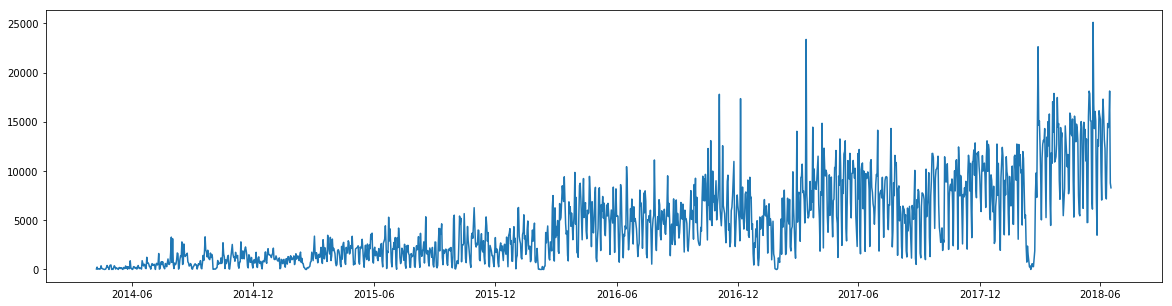

In [63]:
plt.figure(figsize=(20,5))
plt.plot(data1['重量'][:])

In [64]:
data1=data1[list(data1.columns[:52])+list(data1.columns[-4:])]
#data1.drop('itemfeature_1',axis=1,inplace=True)

In [65]:
data2=data2[list(data2.columns[:52])+list(data2.columns[-4:])]
#data2.drop('itemfeature_1',axis=1,inplace=True)

In [66]:
data1.loc[:,'wday'][data1['wday']<=5]=0
data1.loc[:,'wday'][data1['wday']>5]=1

In [67]:
data2.loc[:,'wday'][data2['wday']<=5]=0
data2.loc[:,'wday'][data2['wday']>5]=1

In [68]:
data1.head()

,重量,重量_1,重量_2,重量_3,重量_4,重量_5,重量_6,重量_7,重量_8,重量_9,...,重量_185,重量_363,重量_364,重量_365,重量_366,重量_367,year,mon,mday,wday
单据创建时间,,,,,,,,,,,,,,,,,,,,,
2014-04-08,47.649,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,4.0,8.0,0.0
2014-04-09,236.411,47.649,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,4.0,9.0,0.0
2014-04-10,23.954,236.411,47.649,0.000,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,4.0,10.0,0.0
2014-04-11,60.529,23.954,236.411,47.649,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,4.0,11.0,0.0
2014-04-12,71.323,60.529,23.954,236.411,47.649,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,4.0,12.0,0.0


In [69]:
'''
from sklearn.preprocessing import OneHotEncoder
def onehot(data1,columns_):
    enc = OneHotEncoder()
    enc.fit(pd.DataFrame(data1[columns_]))
    tem=pd.DataFrame(enc.transform(pd.DataFrame(data1[columns_])).toarray())
    tem.columns=[columns_+str(i) for i in tem.columns]
    tem.index=data1.index
    data1.drop(columns_,axis=1,inplace=True)
    data1=pd.merge(data1,
                     tem,left_index=True,right_index=True)
    return data1
data1.loc[:,'mon'][data1['mon']==1]=1
data1.loc[:,'mon'][data1['mon']==2]=1
data1.loc[:,'mon'][data1['mon']==3]=1
data1.loc[:,'mon'][data1['mon']==4]=2
data1.loc[:,'mon'][data1['mon']==5]=2
data1.loc[:,'mon'][data1['mon']==6]=2
data1.loc[:,'mon'][data1['mon']==7]=3
data1.loc[:,'mon'][data1['mon']==8]=3
data1.loc[:,'mon'][data1['mon']==9]=3
data1.loc[:,'mon'][data1['mon']==10]=4
data1.loc[:,'mon'][data1['mon']==11]=4
data1.loc[:,'mon'][data1['mon']==12]=4

data1.loc[:,'mday'][data1['mday']<=10]=0
data1.loc[:,'mday'][(data1['mday']>10) & (data1['mday']<20)]=15
data1.loc[:,'mday'][data1['mday']>=20]=30
data1.loc[:,'wday'][data1['wday']<=5]=0
data1.loc[:,'wday'][data1['wday']>5]=7
list_=['year','mon','mday','wday']
for i in list_:
    print(i)
    data1=onehot(data1,i)
data1.head()
'''

"\nfrom sklearn.preprocessing import OneHotEncoder\ndef onehot(data1,columns_):\n    enc = OneHotEncoder()\n    enc.fit(pd.DataFrame(data1[columns_]))\n    tem=pd.DataFrame(enc.transform(pd.DataFrame(data1[columns_])).toarray())\n    tem.columns=[columns_+str(i) for i in tem.columns]\n    tem.index=data1.index\n    data1.drop(columns_,axis=1,inplace=True)\n    data1=pd.merge(data1,\n                     tem,left_index=True,right_index=True)\n    return data1\ndata1.loc[:,'mon'][data1['mon']==1]=1\ndata1.loc[:,'mon'][data1['mon']==2]=1\ndata1.loc[:,'mon'][data1['mon']==3]=1\ndata1.loc[:,'mon'][data1['mon']==4]=2\ndata1.loc[:,'mon'][data1['mon']==5]=2\ndata1.loc[:,'mon'][data1['mon']==6]=2\ndata1.loc[:,'mon'][data1['mon']==7]=3\ndata1.loc[:,'mon'][data1['mon']==8]=3\ndata1.loc[:,'mon'][data1['mon']==9]=3\ndata1.loc[:,'mon'][data1['mon']==10]=4\ndata1.loc[:,'mon'][data1['mon']==11]=4\ndata1.loc[:,'mon'][data1['mon']==12]=4\n\ndata1.loc[:,'mday'][data1['mday']<=10]=0\ndata1.loc[:,'mday'][(

In [70]:
'''
data2.loc[:,'mon'][data2['mon']==1]=1
data2.loc[:,'mon'][data2['mon']==2]=1
data2.loc[:,'mon'][data2['mon']==3]=1
data2.loc[:,'mon'][data2['mon']==4]=2
data2.loc[:,'mon'][data2['mon']==5]=2
data2.loc[:,'mon'][data2['mon']==6]=2
data2.loc[:,'mon'][data2['mon']==7]=3
data2.loc[:,'mon'][data2['mon']==8]=3
data2.loc[:,'mon'][data2['mon']==9]=3
data2.loc[:,'mon'][data2['mon']==10]=4
data2.loc[:,'mon'][data2['mon']==11]=4
data2.loc[:,'mon'][data2['mon']==12]=4
data2.loc[:,'mday'][data2['mday']<=10]=0
data2.loc[:,'mday'][(data2['mday']>10) & (data2['mday']<20)]=15
data2.loc[:,'mday'][data2['mday']>=20]=30
data2.loc[:,'wday'][data2['wday']<=5]=0
data2.loc[:,'wday'][data2['wday']>5]=7
list_=['year','mon','mday','wday']
for i in list_:
    print(i)
    data2=onehot(data2,i)
data2.head()
'''

"\ndata2.loc[:,'mon'][data2['mon']==1]=1\ndata2.loc[:,'mon'][data2['mon']==2]=1\ndata2.loc[:,'mon'][data2['mon']==3]=1\ndata2.loc[:,'mon'][data2['mon']==4]=2\ndata2.loc[:,'mon'][data2['mon']==5]=2\ndata2.loc[:,'mon'][data2['mon']==6]=2\ndata2.loc[:,'mon'][data2['mon']==7]=3\ndata2.loc[:,'mon'][data2['mon']==8]=3\ndata2.loc[:,'mon'][data2['mon']==9]=3\ndata2.loc[:,'mon'][data2['mon']==10]=4\ndata2.loc[:,'mon'][data2['mon']==11]=4\ndata2.loc[:,'mon'][data2['mon']==12]=4\ndata2.loc[:,'mday'][data2['mday']<=10]=0\ndata2.loc[:,'mday'][(data2['mday']>10) & (data2['mday']<20)]=15\ndata2.loc[:,'mday'][data2['mday']>=20]=30\ndata2.loc[:,'wday'][data2['wday']<=5]=0\ndata2.loc[:,'wday'][data2['wday']>5]=7\nlist_=['year','mon','mday','wday']\nfor i in list_:\n    print(i)\n    data2=onehot(data2,i)\ndata2.head()\n"

In [71]:
extra_weather=pd.read_csv("/home/ruanlx/天气爬虫/extra_wether.csv")
#extra_weather=extra_weather.iloc[:,1:]
extra_weather.index=pd.DatetimeIndex(extra_weather['单据创建时间'])
extra_weather.drop('单据创建时间',axis=1,inplace=True)
extra_weather=extra_weather[extra_weather.index>'2016-1-1']
extra_weather=extra_weather[extra_weather.index<start]

In [72]:
isholiday=pd.read_csv('holiday.csv')
isholiday.index=pd.DatetimeIndex(isholiday['date'])
isholiday.drop('date',axis=1,inplace=True)
isholiday=isholiday[isholiday.index>'2016-1-1']
isholiday=isholiday[isholiday.index<start]

In [73]:
fangjiaxiaoying=pd.read_csv('fangjiaxiaoying.csv',header=None)
fangjiaxiaoying.columns=['date','fangjiaxiaoying']
fangjiaxiaoying.index=pd.DatetimeIndex(fangjiaxiaoying['date'])
fangjiaxiaoying.drop('date',axis=1,inplace=True)
fangjiaxiaoying=fangjiaxiaoying[fangjiaxiaoying.index>'2016-1-1']
fangjiaxiaoying=fangjiaxiaoying[fangjiaxiaoying.index<start]

In [74]:
time_=list(range(1,data1.shape[0]+1))

In [75]:
#data1['重量']=(data1['重量']/list(range(1,data1.shape[0]+1)))

In [76]:
#data2['重量']=(data2['重量']/list(range(1,data2.shape[0]+1)))

In [77]:
data1=data1[data1.index>'2016-1-1']

In [78]:
data2=data2[data2.index>'2016-1-1']

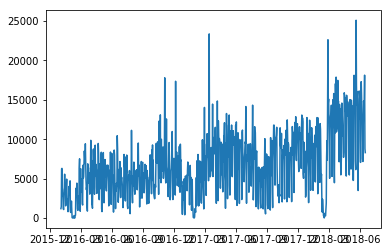

In [79]:
plt.plot(data1['重量'])

In [80]:
data1.iloc[:,:52]=np.log(data1.iloc[:,:52]+0.1)
data2.iloc[:,:52]=np.log(data2.iloc[:,:52]+0.1)

In [81]:
data1=pd.merge(data1,fangjiaxiaoying,left_index=True,right_index=True)
data2=pd.merge(data2,fangjiaxiaoying,left_index=True,right_index=True)

data1=pd.merge(data1,isholiday,left_index=True,right_index=True)
data2=pd.merge(data2,isholiday,left_index=True,right_index=True)

data1=pd.merge(data1,extra_weather,left_index=True,right_index=True)
data2=pd.merge(data2,extra_weather,left_index=True,right_index=True)

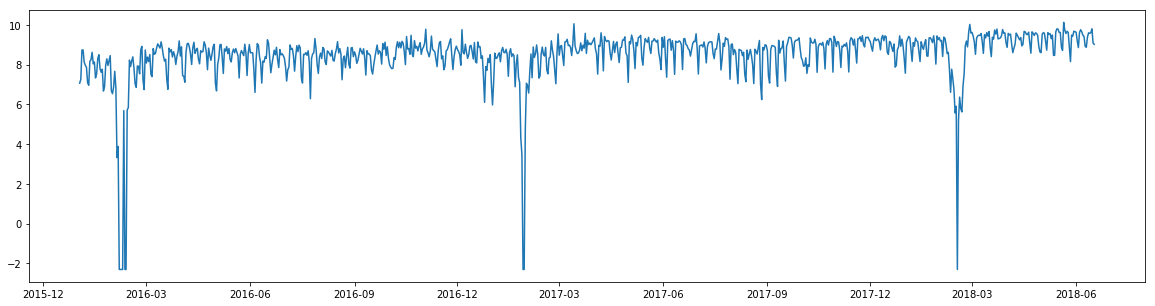

In [82]:
plt.figure(figsize=(20,5))
plt.plot(data1['重量'])

In [83]:
data1.head()

,重量,重量_1,重量_2,重量_3,重量_4,重量_5,重量_6,重量_7,重量_8,重量_9,...,重量_365,重量_366,重量_367,year,mon,mday,wday,fangjiaxiaoying,isholiday,极端天气
单据创建时间,,,,,,,,,,,,,,,,,,,,,
2016-01-02,7.070098,4.110208,8.058915,7.926507,8.375951,8.009413,6.718845,6.734129,7.983547,7.858409,...,6.906766,6.956367,7.680381,2016.0,1.0,2.0,0.0,2.051942,1,0
2016-01-03,7.263728,7.070098,4.110208,8.058915,7.926507,8.375951,8.009413,6.718845,6.734129,7.983547,...,6.937617,6.906766,6.956367,2016.0,1.0,3.0,1.0,2.562557,1,0
2016-01-04,8.734593,7.263728,7.070098,4.110208,8.058915,7.926507,8.375951,8.009413,6.718845,6.734129,...,7.228155,6.937617,6.906766,2016.0,1.0,4.0,0.0,1.903677,0,0
2016-01-05,8.746762,8.734593,7.263728,7.070098,4.110208,8.058915,7.926507,8.375951,8.009413,6.718845,...,7.052032,7.228155,6.937617,2016.0,1.0,5.0,0.0,1.150945,0,0
2016-01-06,8.123532,8.746762,8.734593,7.263728,7.070098,4.110208,8.058915,7.926507,8.375951,8.009413,...,6.825546,7.052032,7.228155,2016.0,1.0,6.0,0.0,0.837109,0,0


In [84]:
y1=data1['重量']
x1=data1.drop('重量',axis=1)
train_x1=np.array(x1.iloc[:-7,:])
train_y1=np.array(y1[:-7])
test_x1=np.array(x1.iloc[-7:,:])
test_y1=np.array(y1[-7:])
'''春节效应造成的验证集不再是最近的7天，而是去年同期
valid_x=x1[x1.index>='2017-2-11']
valid_x=valid_x[valid_x.index<='2017-3-10']
valid_y=y1[y1.index>='2017-2-11']
valid_y=valid_y[valid_y.index<='2017-3-10']
train_x1=np.array(x1[x1.index<'2017-2-11'])
train_y1=np.array(y1[y1.index<'2017-2-11'])
test_x1=np.array(valid_x)
test_y1=np.array(valid_y)
'''

"春节效应造成的验证集不再是最近的7天，而是去年同期\nvalid_x=x1[x1.index>='2017-2-11']\nvalid_x=valid_x[valid_x.index<='2017-3-10']\nvalid_y=y1[y1.index>='2017-2-11']\nvalid_y=valid_y[valid_y.index<='2017-3-10']\ntrain_x1=np.array(x1[x1.index<'2017-2-11'])\ntrain_y1=np.array(y1[y1.index<'2017-2-11'])\ntest_x1=np.array(valid_x)\ntest_y1=np.array(valid_y)\n"

In [85]:
y2=data2['重量']
x2=data2.drop('重量',axis=1)
train_x2=np.array(x2.iloc[:-7,:])
train_y2=np.array(y2[:-7])
test_x2=np.array(x2.iloc[-7:,:])
test_y2=np.array(y2[-7:])
'''春节效应造成的验证集不再是最近的7天，而是去年同期
valid_x=x2[x2.index>='2017-2-11']
valid_x=valid_x[valid_x.index<='2017-3-10']
valid_y=y2[y2.index>='2017-2-11']
valid_y=valid_y[valid_y.index<='2017-3-10']
train_x2=np.array(x2[x2.index<'2017-2-11'])
train_y2=np.array(y2[y2.index<'2017-2-11'])
test_x2=np.array(valid_x)
test_y2=np.array(valid_y)'''

"春节效应造成的验证集不再是最近的7天，而是去年同期\nvalid_x=x2[x2.index>='2017-2-11']\nvalid_x=valid_x[valid_x.index<='2017-3-10']\nvalid_y=y2[y2.index>='2017-2-11']\nvalid_y=valid_y[valid_y.index<='2017-3-10']\ntrain_x2=np.array(x2[x2.index<'2017-2-11'])\ntrain_y2=np.array(y2[y2.index<'2017-2-11'])\ntest_x2=np.array(valid_x)\ntest_y2=np.array(valid_y)"

In [86]:
from sklearn import preprocessing
scaler_x1 = preprocessing.StandardScaler().fit(train_x1)
train_x1=scaler_x1.transform(train_x1)       
scaler_x2 = preprocessing.StandardScaler().fit(train_x2)
train_x2=scaler_x2.transform(train_x2)  

scaler_y1 = preprocessing.StandardScaler().fit(train_y1.reshape((-1,1)))
train_y1=scaler_y1.transform(train_y1.reshape((-1,1)))       
scaler_y2 = preprocessing.StandardScaler().fit(train_y2.reshape((-1,1)))
train_y2=scaler_y2.transform(train_y2.reshape((-1,1)))  


In [87]:
test_x1=scaler_x1.transform(test_x1)   
test_x2=scaler_x2.transform(test_x2)
test_y1=scaler_y1.transform(test_y1.reshape((-1,1)))   
test_y2=scaler_y2.transform(test_y2.reshape((-1,1)))


In [88]:
b=multitask(train_x1,train_y1,train_x2,train_y2,lambda1=0.1,lambda2=566.33,lambda3=0.089,times=1000)

In [89]:
def predict(test_x1,beta1,test_y1=[np.nan]):
    y_pred=np.dot(np.insert(test_x1, 0, values=1, axis=1),beta1)
    if sum(np.isnan(test_y1)):
        return {'yhat':y_pred}
    else:
        return {"yhat":y_pred,"mae":sklearn.metrics.mean_absolute_error(test_y1,y_pred)}
predict(test_x1,b['beta1'],test_y1)

{'yhat': array([[ 0.60804063],
        [ 0.68662543],
        [ 0.70981175],
        [ 0.71622641],
        [ 0.65265461],
        [ 0.12781871],
        [-0.16834363]]), 'mae': 0.22760261357235173}

In [90]:
#np.exp(scaler_y1.inverse_transform(predict(test_x1,b['beta1'],test_y1)['yhat']))-0.5

In [91]:
'''
import itertools
lambda1=np.linspace(0,1,num=10)
#lambda2=np.hstack((np.linspace(80,200,num=7),np.linspace(0.1,1,num=10)))
#lambda3=np.hstack((np.linspace(80,200,num=7),np.linspace(0.1,1,num=10)))
lambda2=np.linspace(200,300,num=10)
lambda3=np.linspace(200,400,num=10)

mae=[]
for i in itertools.product(lambda1,lambda2,lambda3):
    b=multitask(train_x1,train_y1,train_x2,train_y2,lambda1=i[0],lambda2=i[1],lambda3=i[2],times=1000)
    #print([i[0],i[1],i[2],predict(test_x1,test_y1,b['beta1'])['mae']])
    mae.append([i[0],i[1],i[2],predict(test_x1,b['beta1'],test_y1)['mae']])

mae=pd.DataFrame(mae)
mae.columns=['lambda1','lambda2','lambda3','mae']



lambda_=mae[mae['mae']==np.min(mae['mae'])].iloc[0,:]
print(lambda_)
b=multitask(train_x1,train_y1,train_x2,train_y2,lambda1=lambda_[0],lambda2=lambda_[1],lambda3=lambda_[2],times=1000)
yhat=predict(test_x1,b['beta1'],test_y1)
print(yhat['mae'])
#scaler_y1.inverse_transform(yhat['yhat'])
'''

"\nimport itertools\nlambda1=np.linspace(0,1,num=10)\n#lambda2=np.hstack((np.linspace(80,200,num=7),np.linspace(0.1,1,num=10)))\n#lambda3=np.hstack((np.linspace(80,200,num=7),np.linspace(0.1,1,num=10)))\nlambda2=np.linspace(200,300,num=10)\nlambda3=np.linspace(200,400,num=10)\n\nmae=[]\nfor i in itertools.product(lambda1,lambda2,lambda3):\n    b=multitask(train_x1,train_y1,train_x2,train_y2,lambda1=i[0],lambda2=i[1],lambda3=i[2],times=1000)\n    #print([i[0],i[1],i[2],predict(test_x1,test_y1,b['beta1'])['mae']])\n    mae.append([i[0],i[1],i[2],predict(test_x1,b['beta1'],test_y1)['mae']])\n\nmae=pd.DataFrame(mae)\nmae.columns=['lambda1','lambda2','lambda3','mae']\n\n\n\nlambda_=mae[mae['mae']==np.min(mae['mae'])].iloc[0,:]\nprint(lambda_)\nb=multitask(train_x1,train_y1,train_x2,train_y2,lambda1=lambda_[0],lambda2=lambda_[1],lambda3=lambda_[2],times=1000)\nyhat=predict(test_x1,b['beta1'],test_y1)\nprint(yhat['mae'])\n#scaler_y1.inverse_transform(yhat['yhat'])\n"

In [92]:
lambda_=[0.667,255.56,244.44]
b=multitask(train_x1,train_y1,train_x2,train_y2,lambda1=lambda_[0],lambda2=lambda_[1],lambda3=lambda_[2],times=1000)
yhat=predict(test_x1,b['beta1'],test_y1)
print(yhat['mae'])

0.17977510724624


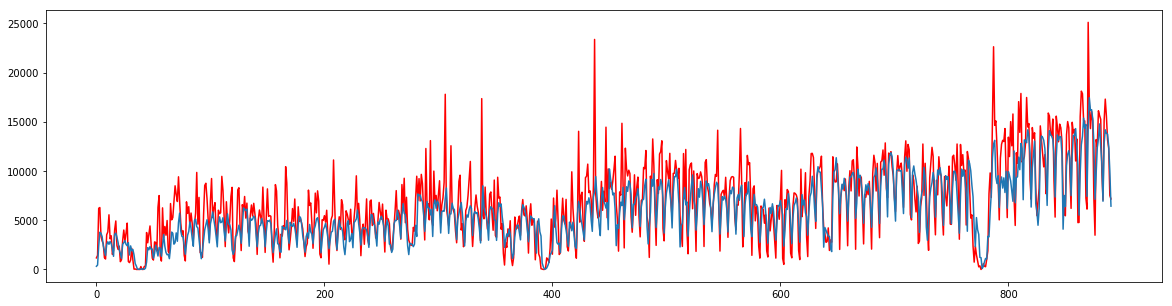

In [93]:
plt.figure(figsize=(20,5))
plt.plot(np.exp(scaler_y1.inverse_transform(train_y1))-0.1,color='red')
plt.plot(np.exp(scaler_y1.inverse_transform(predict(train_x1,b['beta1'],train_y1)['yhat']))-1)

#plt.plot(np.array(np.exp(y1)-0.1),color='red')

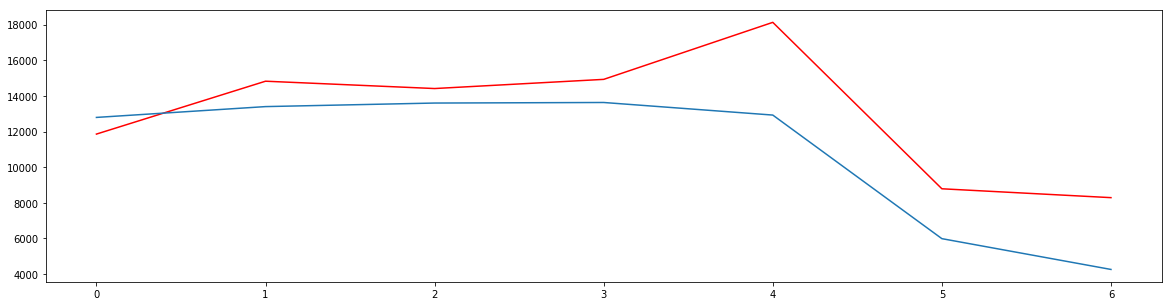

In [94]:
plt.figure(figsize=(20,5))
plt.plot(np.exp(scaler_y1.inverse_transform(test_y1))-0.1,color='red')
plt.plot(np.exp(scaler_y1.inverse_transform(predict(test_x1,b['beta1'],test_y1)['yhat']))-1)


In [95]:
import time, datetime
def ymd(d):
    a=np.zeros(d.shape[0])
    b=np.zeros(d.shape[0])
    c=np.zeros(d.shape[0])
    e=np.zeros(d.shape[0])
    for i in range(d.shape[0]):
        timeArray = time.strptime(str(d.index[i])[:10], "%Y-%m-%d")
        a[i]=timeArray.tm_year
        b[i]=timeArray.tm_mon
        c[i]=timeArray.tm_mday
        e[i]=timeArray.tm_wday
    d['year']=(a-scaler_x1.mean_[-7])/(np.sqrt(scaler_x1.var_)[-7])
    d['mon']=(b-scaler_x1.mean_[-6])/(np.sqrt(scaler_x1.var_)[-6])
    d['mday']=(c-scaler_x1.mean_[-5])/(np.sqrt(scaler_x1.var_)[-5])
    e[e<=5]=0
    e[e>5]=1
    d['wday']=(e-scaler_x1.mean_[-4])/(np.sqrt(scaler_x1.var_)[-4])


In [96]:
fangjiaxiaoying=pd.read_csv('fangjiaxiaoying.csv',header=None)
fangjiaxiaoying.columns=['date','fangjiaxiaoying']
fangjiaxiaoying.index=pd.DatetimeIndex(fangjiaxiaoying['date'])
fangjiaxiaoying.drop('date',axis=1,inplace=True)
fangjiaxiaoying=fangjiaxiaoying[fangjiaxiaoying.index>=start]
fangjiaxiaoying=fangjiaxiaoying[fangjiaxiaoying.index<=end]
fangjiaxiaoying=(fangjiaxiaoying-scaler_x1.mean_[-3])/(np.sqrt(scaler_x1.var_)[-3])

In [97]:
isholiday=pd.read_csv('holiday.csv')
isholiday.index=pd.DatetimeIndex(isholiday['date'])
isholiday.drop('date',axis=1,inplace=True)
isholiday=isholiday[isholiday.index>=start]
isholiday=isholiday[isholiday.index<=end]
isholiday=(isholiday-scaler_x1.mean_[-2])/(np.sqrt(scaler_x1.var_)[-2])
#isholiday

In [98]:
extra_weather=pd.read_csv("/home/ruanlx/天气爬虫/extra_wether.csv")
#extra_weather=extra_weather.iloc[:,1:]
extra_weather.index=pd.DatetimeIndex(extra_weather['单据创建时间'])
extra_weather.drop('单据创建时间',axis=1,inplace=True)
extra_weather=extra_weather[extra_weather.index>=start]
extra_weather=extra_weather[extra_weather.index<=end]
extra_weather=(extra_weather-scaler_x1.mean_[-1])/(np.sqrt(scaler_x1.var_)[-1])

In [99]:
train_index=x1.index
train_columns=x1.columns
x1=pd.DataFrame(scaler_x1.transform(x1))
x1.index=train_index
x1.columns=train_columns
y1=pd.DataFrame(scaler_y1.transform(np.array(y1).reshape((-1,1))))
y1=y1[0]
y1.index=train_index

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [100]:
import matplotlib.pyplot as plt

In [101]:
x1.columns

Index(['重量_1', '重量_2', '重量_3', '重量_4', '重量_5', '重量_6', '重量_7', '重量_8', '重量_9',
       '重量_10', '重量_11', '重量_12', '重量_13', '重量_14', '重量_15', '重量_16', '重量_17',
       '重量_18', '重量_19', '重量_20', '重量_21', '重量_22', '重量_23', '重量_24', '重量_25',
       '重量_26', '重量_27', '重量_28', '重量_29', '重量_30', '重量_31', '重量_32', '重量_33',
       '重量_34', '重量_90', '重量_91', '重量_92', '重量_93', '重量_94', '重量_95', '重量_180',
       '重量_181', '重量_182', '重量_183', '重量_184', '重量_185', '重量_363', '重量_364',
       '重量_365', '重量_366', '重量_367', 'year', 'mon', 'mday', 'wday',
       'fangjiaxiaoying', 'isholiday', '极端天气'],
      dtype='object')

In [102]:

from statsmodels.tsa.arima_model import ARIMA
import datetime 
def ts_predict(b,time_series,train,start,end):
    index=pd.DatetimeIndex(start=start, end=end, freq='D')
    start=pd.DatetimeIndex([start])
    end=pd.DatetimeIndex([end])
    timelength=int(((end-start).values)/86400000000000)+1
    test=np.zeros((timelength,len(train.columns)))
    test=pd.DataFrame(test,index=index,columns=train.columns)
    #test['天']=[data1.shape[0]+i for i in range(1,timelength+1)]
    ymd(test)
    test['isholiday']=isholiday
    test['极端天气']=extra_weather
    print(test.shape)
    for i in train.columns:
        if i.split('_')[0]=="userfeature":
            print(1)
            try:
                model_user = ARIMA(train[i],order=(7,0,0))
                arima_result = model_user.fit()
                test.loc[:,i] = arima_result.predict(start=(str(start.values[0]).split('T')[0]),
                                                 end=(str(end.values[0]).split('T')[0]),
                                                 dynamic=True)  
            except np.linalg.LinAlgError:
                print("MMP")
            #print((str(start.values[0]).split('T')[0]))
            print(i)
            
        if i.split('_')[0]=="itemfeature":
            model_user = ARIMA(train[i],order=(7,0,0))
            arima_result = model_user.fit()
            test.loc[:,i] = arima_result.predict(start=(str(start.values[0]).split('T')[0]),
                                                 end=(str(end.values[0]).split('T')[0]),
                                                 dynamic=True)         
    for i in index:      
        if(bool(pd.isna(time_series[pd.DatetimeIndex([i-datetime.timedelta(days =1)])].values))):
           # print(predict(np.array(test.loc[i-datetime.timedelta(days =1),:]).reshape((1,-1)),beta1=b['beta1']))
            time_series[i-datetime.timedelta(days =1)]=float(predict(np.array(test.loc[i-datetime.timedelta(days =1),:]).reshape((1,-1)),beta1=b['beta1'])['yhat'])
            
                
        for j in train.columns:
            if j.split('_')[0]=="重量":
                test.loc[i,j]=time_series[i-datetime.timedelta(days =int(j.split('_')[1]))]               
    print(test)
    time_series[i]=float(predict(np.array(test.loc[i-datetime.timedelta(days =1),:]).reshape((1,-1)),beta1=b['beta1'])['yhat'])

    return time_series[-length:]
a=ts_predict(b,y1,x1,start,end)
a

(28, 58)
                重量_1      重量_2      重量_3      重量_4      重量_5      重量_6  \
2018-06-18  0.397134  0.439955  0.971958  0.829274  0.803491  0.824177   
2018-06-19  0.262493  0.397134  0.439955  0.971958  0.829274  0.803491   
2018-06-20  0.650108  0.262493  0.397134  0.439955  0.971958  0.829274   
2018-06-21  0.688482  0.650108  0.262493  0.397134  0.439955  0.971958   
2018-06-22  0.697598  0.688482  0.650108  0.262493  0.397134  0.439955   
2018-06-23  0.671752  0.697598  0.688482  0.650108  0.262493  0.397134   
2018-06-24  0.491877  0.671752  0.697598  0.688482  0.650108  0.262493   
2018-06-25  0.276296  0.491877  0.671752  0.697598  0.688482  0.650108   
2018-06-26  0.658105  0.276296  0.491877  0.671752  0.697598  0.688482   
2018-06-27  0.787052  0.658105  0.276296  0.491877  0.671752  0.697598   
2018-06-28  0.824984  0.787052  0.658105  0.276296  0.491877  0.671752   
2018-06-29  0.826998  0.824984  0.787052  0.658105  0.276296  0.491877   
2018-06-30  0.789016  0.82699

单据创建时间
2018-06-18    0.262493
2018-06-19    0.650108
2018-06-20    0.688482
2018-06-21    0.697598
2018-06-22    0.671752
2018-06-23    0.491877
2018-06-24    0.276296
2018-06-25    0.658105
2018-06-26    0.787052
2018-06-27    0.824984
2018-06-28    0.826998
2018-06-29    0.789016
2018-06-30    0.673207
2018-07-01    0.243712
2018-07-02    0.592938
2018-07-03    0.740896
2018-07-04    0.723713
2018-07-05    0.708980
2018-07-06    0.676817
2018-07-07    0.581026
2018-07-08    0.294128
2018-07-09    0.644425
2018-07-10    0.760416
2018-07-11    0.756825
2018-07-12    0.768040
2018-07-13    0.741986
2018-07-14    0.610059
2018-07-15    0.610059
Name: 0, dtype: float64

In [103]:
b['beta1']

array([[ 1.59259740e-14],
       [ 2.75059588e-01],
       [ 9.47043292e-02],
       [ 9.35630664e-02],
       [ 1.53235593e-02],
       [ 2.30552186e-02],
       [ 4.10943093e-03],
       [ 2.19137596e-02],
       [-1.83373151e-02],
       [-4.61827107e-02],
       [-2.36810066e-03],
       [-4.94598112e-03],
       [ 5.78560602e-03],
       [ 4.09435078e-02],
       [ 3.33320012e-02],
       [-8.16100784e-03],
       [-4.80524614e-03],
       [-1.19660443e-02],
       [-7.06940236e-03],
       [ 5.54722793e-03],
       [ 1.40545239e-02],
       [ 2.57699371e-02],
       [-1.01599938e-02],
       [ 2.34036283e-03],
       [-8.93745792e-03],
       [ 3.72162046e-03],
       [-2.74324028e-03],
       [ 4.05474871e-02],
       [ 4.52782790e-02],
       [-2.39900375e-02],
       [-2.24756232e-02],
       [-1.16761129e-02],
       [ 4.86387419e-03],
       [-9.96157941e-03],
       [ 3.62712114e-02],
       [ 2.05009613e-03],
       [ 8.76962465e-03],
       [-1.62115627e-02],
       [ 1.6

In [104]:
x1.columns

Index(['重量_1', '重量_2', '重量_3', '重量_4', '重量_5', '重量_6', '重量_7', '重量_8', '重量_9',
       '重量_10', '重量_11', '重量_12', '重量_13', '重量_14', '重量_15', '重量_16', '重量_17',
       '重量_18', '重量_19', '重量_20', '重量_21', '重量_22', '重量_23', '重量_24', '重量_25',
       '重量_26', '重量_27', '重量_28', '重量_29', '重量_30', '重量_31', '重量_32', '重量_33',
       '重量_34', '重量_90', '重量_91', '重量_92', '重量_93', '重量_94', '重量_95', '重量_180',
       '重量_181', '重量_182', '重量_183', '重量_184', '重量_185', '重量_363', '重量_364',
       '重量_365', '重量_366', '重量_367', 'year', 'mon', 'mday', 'wday',
       'fangjiaxiaoying', 'isholiday', '极端天气'],
      dtype='object')

In [105]:
#scaler_y1.inverse_transform(a)

In [106]:
sigma=[max(time_)+i for i in (range(1,length+1))]

In [107]:
test_index=a.index
a=scaler_y1.inverse_transform(a)
#a=a*sigma
a=np.exp(a)-0.1
a=pd.Series(a)
a.index=test_index

In [108]:
a=pd.DataFrame(a)
a.columns=[re_col]

a=a+np.exp(scaler_y1.mean_)-0.1

a.to_csv("result_"+re_col+".csv")

In [109]:
a

,cool_ext_week
单据创建时间,
2018-06-18,11731.371036
2018-06-19,16526.375386
2018-06-20,17153.464279
2018-06-21,17307.317878
2018-06-22,16876.047589
2018-06-23,14260.274085
2018-06-24,11862.259065
2018-06-25,16654.373475
2018-06-26,18922.715605


In [110]:
scaler_y1.mean_

array([8.48241611])

In [111]:
np.array(x1).shape

(898, 58)

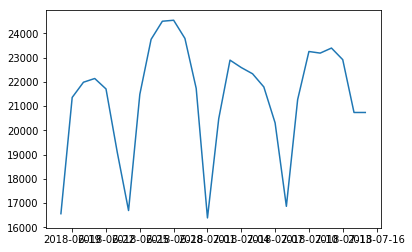

In [112]:
plt.plot(a+np.exp(scaler_y1.mean_)-0.1)

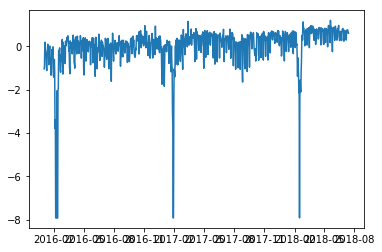

In [113]:
plt.plot(y1)